In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
print(__doc__)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Ridge

%matplotlib inline

Automatically created module for IPython interactive environment


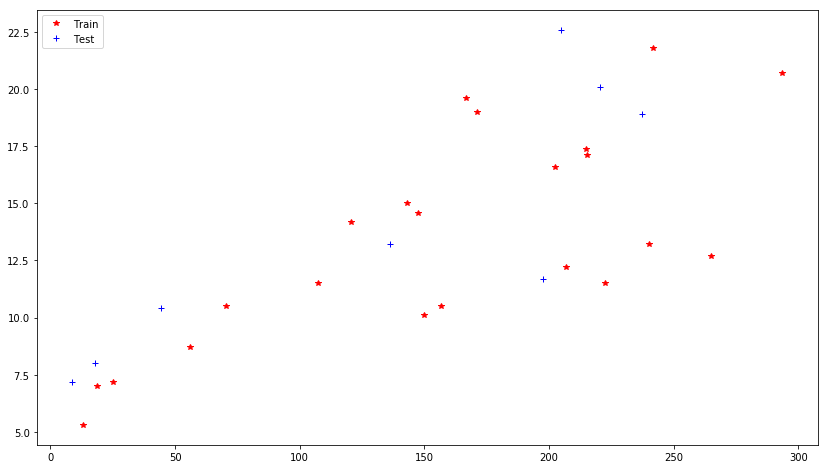

In [5]:
# Data set used in this exercise (Advertising.csv)
data_filename = 'https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/lectures/lecture5/data/Advertising.csv'

# Read Advertising.csv file using pandas libraries:
df = pd.read_csv(data_filename)

df = df[['TV','radio','newspaper','sales']]
df_chap3 = df.sample(n=30)

data_x = df_chap3.TV
data_y = df_chap3.sales

X_train, X_test, y_train, y_test = train_test_split(data_x.values.reshape(-1, 1), data_y.values.reshape(-1, 1))

plt.figure(figsize=(14,8))
plt.plot(X_train, y_train, '*r', label="Train")
plt.plot(X_test, y_test, '+b', label="Test")
plt.legend(loc='upper left')
plt.show()

Train :  [[0.04173918]] [6.92973136]
Test :  [[0.05225229]] [7.03812506]


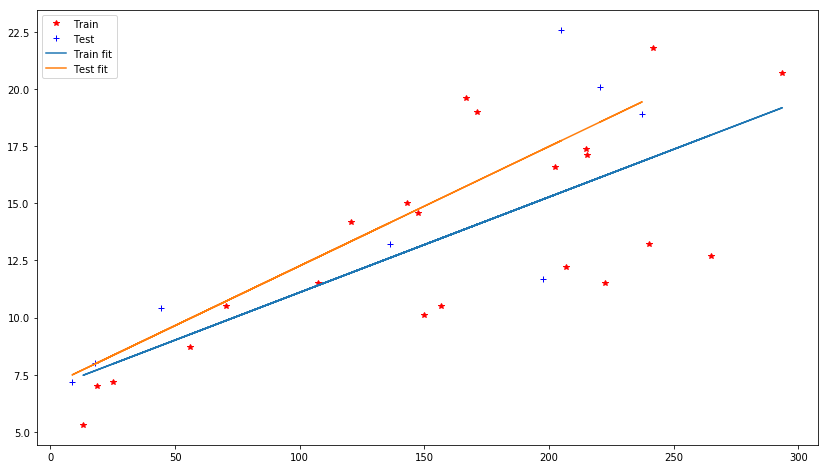

In [6]:
reg_train = LinearRegression().fit(X_train, y_train)
print ('Train : ',reg_train.coef_, reg_train.intercept_ )

reg_test = LinearRegression().fit(X_test, y_test)
print ('Test : ', reg_test.coef_, reg_test.intercept_ )

beta0_train = reg_train.intercept_
beta1_train = reg_train.coef_

y_pred_train = beta0_train + beta1_train * X_train 

beta0_test = reg_test.intercept_
beta1_test = reg_test.coef_

y_pred_test = beta0_test + beta1_test * X_test 

plt.figure(figsize=(14,8))
plt.plot(X_train, y_train, '*r', label="Train")
plt.plot(X_test, y_test, '+b', label="Test")
plt.plot(X_train, y_pred_train, label="Train fit")
plt.plot(X_test, y_pred_test, label="Test fit")

plt.legend(loc='upper left')

plt.show()

3
My MSE is 93.40955096324552


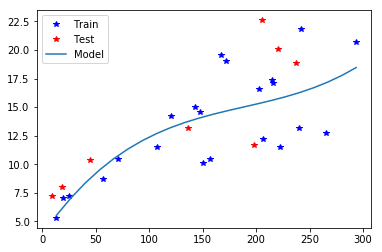

7
My MSE is 88.30025033038481


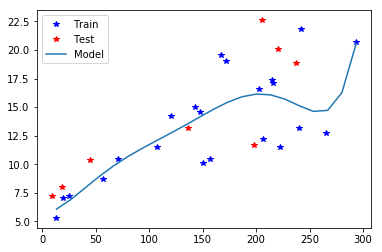

12
My MSE is 65.24349443653783


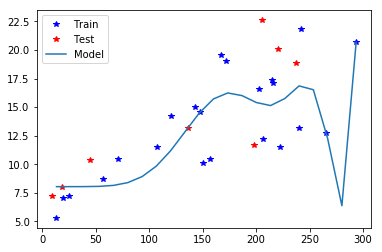

15
My MSE is 58.266551181621146


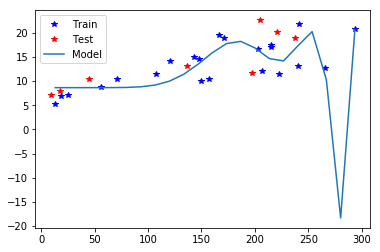

19
My MSE is 46.90696309562786


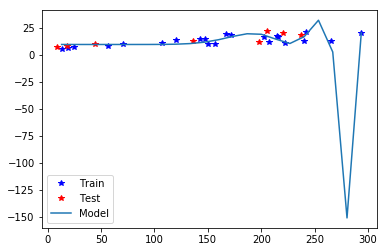

In [8]:
# X_train, X_Test, y_train, y_test

degrees = [3,7,12,15,19]# [i for i in range(2,30, 4)]

df_temp = pd.DataFrame(X_train.reshape(22))

for i in range(len(degrees)):
    print (degrees[i])
    
#   df_temp[degrees[i]] = pd.DataFrame((X_train**degrees[i]).reshape(22))

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()

    poly_traing = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    poly_traing.fit(X_train, y_train)

    pred = poly_traing.predict(y_test)
    
    # Calculate the MSE
    MSE  = np.mean((y_test - pred)**2)

    # Print the results 
    print("My MSE is", MSE)

    linspace = np.linspace(X_train.min(), X_train.max(), y_train.__len__())
    
    plt.plot(X_train, y_train, '*b', label="Train")
    plt.plot(X_test, y_test, '*r', label="Test")
    plt.plot(linspace, poly_traing.predict(linspace[:, np.newaxis]), label="Model")

    plt.legend(loc="best")
    
    plt.show()